# Import Modules

In [422]:
import pandas as pd
import operator
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Loading Data

In [443]:
#https://www.kaggle.com/miroslavsabo/young-people-survey
data1 = pd.read_csv("responses.csv")
data1

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


In [444]:
#column names

for x in data1.columns:
    print(x,end=', ')

Music, Slow songs or fast songs, Dance, Folk, Country, Classical music, Musical, Pop, Rock, Metal or Hardrock, Punk, Hiphop, Rap, Reggae, Ska, Swing, Jazz, Rock n roll, Alternative, Latino, Techno, Trance, Opera, Movies, Horror, Thriller, Comedy, Romantic, Sci-fi, War, Fantasy/Fairy tales, Animated, Documentary, Western, Action, History, Psychology, Politics, Mathematics, Physics, Internet, PC, Economy Management, Biology, Chemistry, Reading, Geography, Foreign languages, Medicine, Law, Cars, Art exhibitions, Religion, Countryside, outdoors, Dancing, Musical instruments, Writing, Passive sport, Active sport, Gardening, Celebrities, Shopping, Science and technology, Theatre, Fun with friends, Adrenaline sports, Pets, Flying, Storm, Darkness, Heights, Spiders, Snakes, Rats, Ageing, Dangerous dogs, Fear of public speaking, Smoking, Alcohol, Healthy eating, Daily events, Prioritising workload, Writing notes, Workaholism, Thinking ahead, Final judgement, Reliability, Keeping promises, Loss 

# Data Cleaning

In [445]:
#dropping necessary columns

data1=data1.iloc[:,:140]
data1=data1.fillna(0.0)

In [446]:
#encoding the columns with categorical data

data1=data1[data1['Internet usage'].apply(lambda x: isinstance(x, str))]
data1=data1[data1['Punctuality'].apply(lambda x: isinstance(x, str))]
data1=data1[data1['Lying'].apply(lambda x: isinstance(x, str))]

#https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd
le = LabelEncoder()

data1['Punctuality'] = le.fit_transform(data1['Punctuality'])
data1['Lying'] = le.fit_transform(data1['Lying'])
data1['Internet usage'] = le.fit_transform(data1['Internet usage'])

In [447]:
# creating new dataframe for convenience

q=pd.DataFrame(columns=['music','movie','hobbies','personality','spending'])

In [448]:
#adjusting the rating values so as to merge the features per group

music_names=list(data1.columns[1:19])

a=0
for x in music_names:  
    a+=data1[x]
    


a=a/(len(music_names)*5)

a=round(1.0 + (5.0 - 1.0) * ((a - 0)/(1.0 - 0))).astype(int)
q['music']=a


movie_names=list(data1.columns[19:31])

a=0
for x in movie_names:  
    a+=data1[x]
    
a=a/(len(movie_names)*5)

a=round(1.0 + (5.0 - 1.0) * ((a - 0)/(1.0 - 0))).astype(int)
q['movie']=a


hobbies_names=list(data1.columns[31:63])

a=0
for x in hobbies_names:  
    a+=data1[x]
    
a=a/(len(hobbies_names)*5)

a=round(1.0 + (5.0 - 1.0) * ((a - 0)/(1.0 - 0))).astype(int)
q['hobbies']=a


personality_names=list(data1.columns[76:133])

a=0
l=0
for x in personality_names:  
    a+=data1[x]
    
    l+=1

a=a/((len(personality_names)-3)*5+9)

a=round(1.0 + (5.0 - 1.0) * ((a - 0)/(1.0 - 0))).astype(int)
q['personality']=a


spending_names=list(data1.columns[133:140])

a=0

for x in spending_names:  
    a+=data1[x]
 

a = a/(len(spending_names)*5)

a=round(1.0 + (5.0 - 1.0) * ((a - 0)/(1.0 - 0))).astype(int)
q['spending']=a

In [450]:
#creating 0 at random placies in dataframe 

samples_indices = q.sample(frac=0.02, replace=False).index
q.loc[samples_indices, 'music'] = 0
samples_indices = q.sample(frac=0.02, replace=False).index
q.loc[samples_indices, 'movie'] = 0     
samples_indices = q.sample(frac=0.02, replace=False).index
q.loc[samples_indices, 'hobbies'] = 0     
samples_indices = q.sample(frac=0.02, replace=False).index
q.loc[samples_indices, 'personality'] = 0 
samples_indices = q.sample(frac=0.02, replace=False).index
q.loc[samples_indices, 'spending'] = 0     

q1=q.copy()
q1

,music,movie,hobbies,personality,spending
0,2,4,3,3,4
1,3,4,3,3,3
2,4,4,4,4,3
3,3,3,3,3,3
4,3,4,3,4,4
...,...,...,...,...,...
1005,4,4,3,3,4
1006,3,4,3,3,3
1007,3,4,3,3,3
1008,3,4,4,4,3


In [477]:
#adjusting the index
q1 = q1.reset_index(drop=True)

#creating labels
y=q['music']+q['movie']+q['hobbies']+q['personality']+q['spending']

for i in range(len(y)):
    if y[i]<17:
        y[i]="Less_interactive"
    else:
        y[i]="Fun and Good"
        
q1["Label"]=y

In [455]:
#creating X and Y sets
X = q1.drop(['Label'], axis=1)
Y = q1['Label']

In [456]:
#train-test split
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=4)

In [457]:
#importing knn modules

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [471]:
#build model for different values of k

acc=[]
k=[2,3,4]
for x in k:
    knn = KNeighborsClassifier(n_neighbors = x).fit(X_train,y_train)
    pred_y = knn.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, pred_y))
    print("The accuracies for k =",x," : ",metrics.accuracy_score(y_test, pred_y)*100)

The accuracies for k = 2  :  99.33774834437085
The accuracies for k = 3  :  99.00662251655629
The accuracies for k = 4  :  98.01324503311258


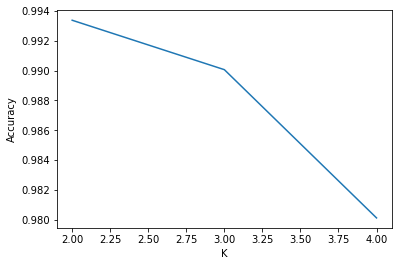

In [472]:
#https://matplotlib.org/stable/plot_types/basic/plot.html

import matplotlib.pyplot as plt

x=k
y=acc
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(x, y)
plt.show()


In [473]:
#knn for cosine measure

acc=[]
k=[2,3,4]
for x in k:
    knn = KNeighborsClassifier(metric='cosine', n_neighbors = x).fit(X_train,y_train)
    pred_y = knn.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, pred_y))
    print("The accuracies for k =",x," : ",metrics.accuracy_score(y_test, pred_y)*100)

The accuracies for k = 2  :  93.04635761589404
The accuracies for k = 3  :  93.37748344370861
The accuracies for k = 4  :  92.05298013245033


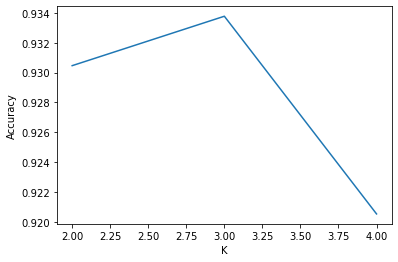

In [474]:
import matplotlib.pyplot as plt

x=k
y=acc
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(x, y)
plt.show()

# recommendation system

In [475]:
q1.astype(bool).sum(axis=0)

music           986
movie           986
hobbies         986
personality     986
spending        986
Label          1006
dtype: int64

In [479]:
q1 = q1.drop(['Label'], axis=1)

from sklearn.neighbors import NearestNeighbors

knn=NearestNeighbors(metric='cosine', algorithm='brute' )
knn.fit(q1.values)
distance_to_people,sim_people=knn.kneighbors(q1.values,n_neighbors=3)

In [480]:
sim_people

array([[   0,  215,  284],
       [   1,    8,   10],
       [   2,   38,   51],
       ...,
       [   1,    8,   10],
       [  29,   33,   34],
       [ 241,  914, 1005]], dtype=int64)

In [481]:
distance_to_people

array([[1.11022302e-16, 1.11022302e-16, 1.11022302e-16],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.11022302e-16, 1.11022302e-16, 1.11022302e-16],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [482]:
q2=q1[(q1.select_dtypes(include=['number'])==0).any(1)]

In [483]:
q2

,music,movie,hobbies,personality,spending
18,4,5,0,3,4
42,4,0,3,3,3
50,4,4,3,0,3
53,4,4,4,0,3
59,3,4,3,0,3
...,...,...,...,...,...
970,4,0,3,4,3
972,0,4,4,4,3
982,4,0,0,4,2
986,0,4,3,3,3


In [484]:
for_pred=[]
for column in q1:
        for_pred.append(q1[column].values)
        

In [485]:
len(for_pred[0])

1006

In [486]:
#create dictionary for column and person where its value is 0

pred_pair={}
l=0
for m in for_pred:

    for n in m:
        if n==0:
            x=np.where(m==n)
            y=np.where(for_pred==m)
            
            pred_pair[l]=x
            
    l+=1

In [487]:
pred_pair

{0: (array([ 150,  179,  241,  248,  281,  378,  407,  457,  468,  491,  500,
          519,  577,  703,  808,  914,  945,  972,  986, 1005], dtype=int64),),
 1: (array([ 42,  71, 124, 216, 243, 346, 407, 510, 577, 591, 758, 782, 802,
         839, 859, 903, 940, 944, 970, 982], dtype=int64),),
 2: (array([ 18,  99, 211, 234, 259, 302, 311, 325, 443, 567, 591, 595, 609,
         676, 702, 767, 806, 864, 916, 982], dtype=int64),),
 3: (array([ 50,  53,  59,  61,  80,  96, 204, 205, 316, 328, 337, 432, 473,
         503, 658, 750, 829, 898, 950, 958], dtype=int64),),
 4: (array([114, 164, 174, 254, 262, 312, 471, 482, 588, 611, 649, 673, 695,
         791, 840, 871, 880, 945, 962, 968], dtype=int64),)}

In [337]:
for key,value in pred_pair.items():
    for x in value[0]:
        print(key,x)

0 22
0 145
0 165
0 167
0 194
0 275
0 314
0 339
0 340
0 361
0 603
0 648
0 666
0 668
0 681
0 837
0 866
0 916
0 989
0 1000
1 17
1 83
1 212
1 247
1 337
1 343
1 442
1 457
1 479
1 563
1 568
1 573
1 609
1 615
1 635
1 651
1 750
1 851
1 914
1 926
2 75
2 163
2 330
2 410
2 455
2 473
2 540
2 584
2 594
2 633
2 643
2 691
2 703
2 705
2 714
2 732
2 907
2 945
2 984
2 991
3 8
3 55
3 172
3 174
3 322
3 414
3 499
3 601
3 614
3 636
3 655
3 675
3 739
3 770
3 839
3 856
3 868
3 884
3 895
3 921
4 17
4 216
4 263
4 297
4 316
4 356
4 430
4 468
4 475
4 508
4 551
4 578
4 592
4 734
4 846
4 870
4 882
4 898
4 917
4 952


In [488]:
#predicting the zero rates by users using the similarity between the users

#https://towardsdatascience.com/item-based-collaborative-filtering-in-python-91f747200fab

for key,value in pred_pair.items():
    for x in value[0]:
        
        person_index = q2.index.tolist().index(x) 

        sim_person_group = sim_people[person_index].tolist()

        distance_to_person_group = distance_to_people[person_index].tolist()
        
        

        if x not in sim_person_group:
        
            sim_person_group=sim_person_group[:-1]
            distance_to_person_group=distance_to_person_group[:-1]

        else:
            person_id = sim_person_group.index(person_index)

            sim_person_group.remove(person_id)
            distance_to_person_group.pop(person_id)
            
            
      
        #R(m, u) = {∑ ⱼ S(m, j)R(j, u)}/ ∑ ⱼ S(m, j)
        
  
        sim=[]
        rate=[]
        for i in range(len(sim_person_group)):
            sim.append(1-distance_to_person_group[i])
        
            rate.append(q1.loc[sim_person_group[i]][key])
        
        print(sim,rate)
        res=0
        for i in range(len(sim_person_group)):
            res+=sim[i]*rate[i]
        
        res/=sum(sim)
        
        print("Predicted rate:", round(res))
        

[1.0, 1.0] [3, 3]
Predicted rate: 3
[1.0, 1.0] [3, 3]
Predicted rate: 3
[1.0, 0.9931459096297017] [3, 4]
Predicted rate: 3
[1.0, 1.0] [3, 3]
Predicted rate: 3
[1.0, 1.0] [3, 3]
Predicted rate: 3
[1.0, 1.0] [3, 3]
Predicted rate: 3
[1.0, 1.0] [3, 3]
Predicted rate: 3
[1.0, 1.0] [2, 2]
Predicted rate: 2
[1.0, 0.9937121504712589] [4, 4]
Predicted rate: 4
[1.0, 1.0] [4, 4]
Predicted rate: 4
[0.9999999999999999, 0.9999999999999999] [4, 4]
Predicted rate: 4
[1.0, 1.0] [3, 3]
Predicted rate: 3
[1.0, 1.0] [4, 4]
Predicted rate: 4
[1.0, 1.0] [3, 3]
Predicted rate: 3
[1.0, 1.0] [3, 3]
Predicted rate: 3
[1.0, 1.0] [4, 4]
Predicted rate: 4
[1.0, 1.0] [3, 3]
Predicted rate: 3
[1.0, 1.0] [3, 3]
Predicted rate: 3
[0.9999999999999999, 0.9999999999999999] [3, 3]
Predicted rate: 3
[1.0, 1.0] [3, 3]
Predicted rate: 3
[1.0, 1.0] [4, 4]
Predicted rate: 4
[1.0, 1.0] [3, 3]
Predicted rate: 3
[1.0, 1.0] [4, 4]
Predicted rate: 4
[1.0, 1.0] [4, 4]
Predicted rate: 4
[1.0, 1.0] [4, 4]
Predicted rate: 4
[1.0, 1.0]

# Top 3 choices for user from each category

In [489]:
z_music=[data1.iloc[:,1:19].columns]

music=data1.iloc[:,1:19].values

music_rating={}
music_score=[]


for i in range(len(music)):
    temp={}
    temp1={}
    for j in range(len(music[i])):
        temp[j]=music[i][j]/5
    
   
    temp = list(dict( sorted(temp.items(), key=operator.itemgetter(1),reverse=True)))

    a=(temp[0]+temp[1]+temp[2])/sum(temp)
    
    temp1['score']=a
    music_score.append(a)
    temp1['top']=[z_music[0][temp[0]],z_music[0][temp[1]],z_music[0][temp[2]]]
    music_rating[i]=temp1
    
music_rating

{0: {'score': 0.08496732026143791,
  'top': ['Pop', 'Rock', 'Slow songs or fast songs']},
 1: {'score': 0.09803921568627451,
  'top': ['Rock', 'Slow songs or fast songs', 'Metal or Hardrock']},
 2: {'score': 0.0784313725490196,
  'top': ['Slow songs or fast songs', 'Musical', 'Rock']},
 3: {'score': 0.1503267973856209,
  'top': ['Alternative', 'Punk', 'Slow songs or fast songs']},
 4: {'score': 0.1111111111111111, 'top': ['Pop', 'Hiphop, Rap', 'Dance']},
 5: {'score': 0.1895424836601307,
  'top': ['Rock', 'Metal or Hardrock', 'Alternative']},
 6: {'score': 0.0457516339869281,
  'top': ['Slow songs or fast songs', 'Dance', 'Pop']},
 7: {'score': 0.08496732026143791,
  'top': ['Rock', 'Pop', 'Slow songs or fast songs']},
 8: {'score': 0.13071895424836602,
  'top': ['Rock', 'Metal or Hardrock', 'Musical']},
 9: {'score': 0.0915032679738562, 'top': ['Folk', 'Musical', 'Rock']},
 10: {'score': 0.1437908496732026,
  'top': ['Pop', 'Techno, Trance', 'Slow songs or fast songs']},
 11: {'score'

In [490]:
z_movie=[data1.iloc[:,20:31].columns]

movie=data1.iloc[:,20:31].values

movie_rating={}
movie_score=[]


for i in range(len(movie)):
    temp={}
    temp1={}
    for j in range(len(movie[i])):
        temp[j]=movie[i][j]/5
    
   
    temp = list(dict( sorted(temp.items(), key=operator.itemgetter(1),reverse=True)))

    a=(temp[0]+temp[1]+temp[2])/sum(temp)
    
    temp1['score']=a
    movie_score.append(a)
    temp1['top']=[z_movie[0][temp[0]],z_movie[0][temp[1]],z_movie[0][temp[2]]]
    movie_rating[i]=temp1
    
movie_rating

{0: {'score': 0.2727272727272727,
  'top': ['Comedy', 'Fantasy/Fairy tales', 'Animated']},
 1: {'score': 0.23636363636363636, 'top': ['Animated', 'Comedy', 'Sci-fi']},
 2: {'score': 0.2545454545454545,
  'top': ['Fantasy/Fairy tales', 'Animated', 'Thriller']},
 3: {'score': 0.16363636363636364,
  'top': ['Documentary', 'Horror', 'Thriller']},
 4: {'score': 0.05454545454545454, 'top': ['Comedy', 'Horror', 'Thriller']},
 5: {'score': 0.05454545454545454, 'top': ['Horror', 'Thriller', 'Comedy']},
 6: {'score': 0.2727272727272727,
  'top': ['Comedy', 'Fantasy/Fairy tales', 'Animated']},
 7: {'score': 0.05454545454545454, 'top': ['Comedy', 'Horror', 'Thriller']},
 8: {'score': 0.14545454545454545, 'top': ['Thriller', 'Comedy', 'War']},
 9: {'score': 0.2, 'top': ['Comedy', 'Romantic', 'Fantasy/Fairy tales']},
 10: {'score': 0.14545454545454545,
  'top': ['Horror', 'Comedy', 'Fantasy/Fairy tales']},
 11: {'score': 0.32727272727272727,
  'top': ['War', 'Fantasy/Fairy tales', 'Animated']},
 12:

In [491]:
z_hobbies=[data1.iloc[:,31:63].columns]

hobbies=data1.iloc[:,31:63].values

hobbies_rating={}
hobbies_score=[]

for i in range(len(hobbies)):
    temp={}
    temp1={}
    for j in range(len(hobbies[i])):
        temp[j]=hobbies[i][j]/5
    
   
    temp = list(dict( sorted(temp.items(), key=operator.itemgetter(1),reverse=True)))

    a=(temp[0]+temp[1]+temp[2])/sum(temp)
    
    temp1['score']=a
    hobbies_score.append(a)
    temp1['top']=[z_hobbies[0][temp[0]],z_hobbies[0][temp[1]],z_hobbies[0][temp[2]]]
    hobbies_rating[i]=temp1
    
hobbies_rating

{0: {'score': 0.02620967741935484,
  'top': ['Psychology', 'Internet', 'Economy Management']},
 1: {'score': 0.04435483870967742,
  'top': ['Mathematics', 'Economy Management', 'Foreign languages']},
 2: {'score': 0.05040322580645161,
  'top': ['Mathematics', 'Reading', 'Foreign languages']},
 3: {'score': 0.05241935483870968, 'top': ['Politics', 'Reading', 'Law']},
 4: {'score': 0.0907258064516129,
  'top': ['Reading', 'Religion', 'Countryside, outdoors']},
 5: {'score': 0.06653225806451613,
  'top': ['History', 'Cars', 'Countryside, outdoors']},
 6: {'score': 0.06048387096774194,
  'top': ['Biology', 'Chemistry', 'Medicine']},
 7: {'score': 0.056451612903225805,
  'top': ['History', 'Internet', 'Active sport']},
 8: {'score': 0.12701612903225806,
  'top': ['Reading', 'Celebrities', 'Theatre']},
 9: {'score': 0.07258064516129033,
  'top': ['Internet', 'Foreign languages', 'Dancing']},
 10: {'score': 0.08064516129032258,
  'top': ['PC', 'Foreign languages', 'Passive sport']},
 11: {'sc

In [492]:
z_personality=[data1.iloc[:,76:133].columns]

personality=data1.iloc[:,76:133].values

personality_rating={}
personality_score=[]

for i in range(len(personality)):
    temp={}
    temp1={}
    for j in range(len(personality[i])):
        temp[j]=personality[i][j]/5
    
   
    temp = list(dict( sorted(temp.items(), key=operator.itemgetter(1),reverse=True)))

    a=(temp[0]+temp[1]+temp[2])/sum(temp)
    
    temp1['score']=a
    personality_score.append(a)
    temp1['top']=[z_personality[0][temp[0]],z_personality[0][temp[1]],z_personality[0][temp[2]]]
    personality_rating[i]=temp1
    
personality_rating

{0: {'score': 0.010651629072681704,
  'top': ['Writing notes', 'Final judgement', 'Funniness']},
 1: {'score': 0.03696741854636591,
  'top': ['Workaholism', 'Elections', 'Getting angry']},
 2: {'score': 0.008145363408521303,
  'top': ['Writing notes', 'Thinking ahead', 'Keeping promises']},
 3: {'score': 0.014411027568922305,
  'top': ['Workaholism', 'Loss of interest', 'Criminal damage']},
 4: {'score': 0.009398496240601503,
  'top': ['Thinking ahead', 'Final judgement', 'Reliability']},
 5: {'score': 0.03571428571428571,
  'top': ['Elections', 'Compassion to animals', 'Borrowed stuff']},
 6: {'score': 0.0037593984962406013,
  'top': ['Prioritising workload', 'Writing notes', 'Workaholism']},
 7: {'score': 0.03195488721804511,
  'top': ['Elections', 'Judgment calls', 'Compassion to animals']},
 8: {'score': 0.018170426065162906,
  'top': ['Final judgement', 'Reliability', 'Empathy']},
 9: {'score': 0.015664160401002505,
  'top': ['Final judgement', 'Keeping promises', 'Decision making

In [493]:
z_spending=[data1.iloc[:,76:133].columns]

spending=data1.iloc[:,76:133].values

spending_rating={}
spending_score=[]

for i in range(len(spending)):
    temp={}
    temp1={}
    for j in range(len(spending[i])):
        temp[j]=spending[i][j]/5
    
   
    temp = list(dict( sorted(temp.items(), key=operator.itemgetter(1),reverse=True)))

    a=(temp[0]+temp[1]+temp[2])/sum(temp)
    
    temp1['score']=a
    spending_score.append(a)
    temp1['top']=[z_spending[0][temp[0]],z_spending[0][temp[1]],z_spending[0][temp[2]]]
    spending_rating[i]=temp1
    
spending_rating

{0: {'score': 0.010651629072681704,
  'top': ['Writing notes', 'Final judgement', 'Funniness']},
 1: {'score': 0.03696741854636591,
  'top': ['Workaholism', 'Elections', 'Getting angry']},
 2: {'score': 0.008145363408521303,
  'top': ['Writing notes', 'Thinking ahead', 'Keeping promises']},
 3: {'score': 0.014411027568922305,
  'top': ['Workaholism', 'Loss of interest', 'Criminal damage']},
 4: {'score': 0.009398496240601503,
  'top': ['Thinking ahead', 'Final judgement', 'Reliability']},
 5: {'score': 0.03571428571428571,
  'top': ['Elections', 'Compassion to animals', 'Borrowed stuff']},
 6: {'score': 0.0037593984962406013,
  'top': ['Prioritising workload', 'Writing notes', 'Workaholism']},
 7: {'score': 0.03195488721804511,
  'top': ['Elections', 'Judgment calls', 'Compassion to animals']},
 8: {'score': 0.018170426065162906,
  'top': ['Final judgement', 'Reliability', 'Empathy']},
 9: {'score': 0.015664160401002505,
  'top': ['Final judgement', 'Keeping promises', 'Decision making